# LTV and Interest Rate Analysis

This notebook explores how different LTV ratios affect interest rates and monthly payments in the London market.

In [4]:
import sys
sys.path.append('..')

from src.mortgage_calculator import MortgageCalculator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid') # to view seaborn styles: [x for x in plt.style.available if 'seaborn' in x]
sns.set_palette('husl')

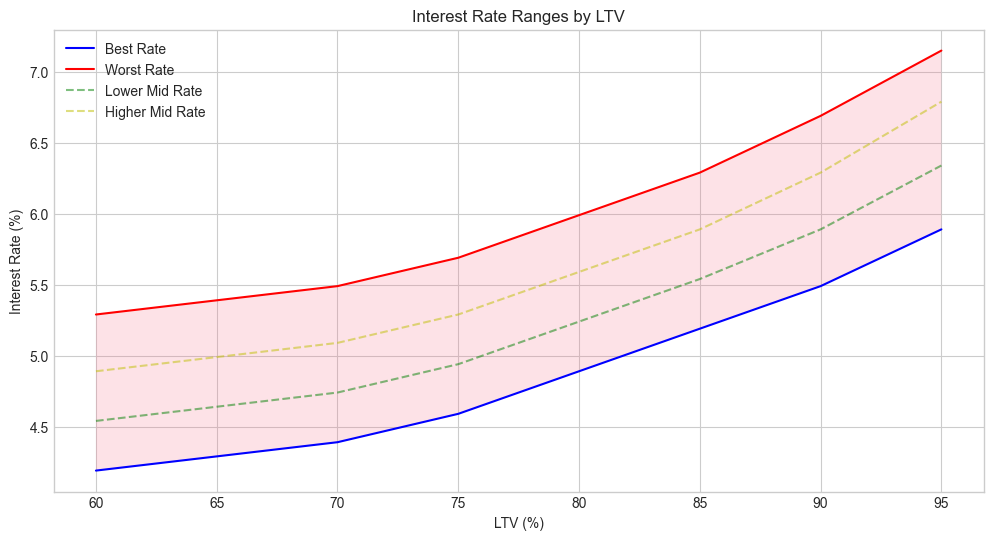

In [7]:
# Initialize calculator
calc = MortgageCalculator()

# Analyze scenarios for different property values common in London
property_values = [400000, 500000, 600000, 750000]
all_scenarios = {}

for value in property_values:
    all_scenarios[value] = calc.analyze_scenarios(value)

# Plot interest rate ranges by LTV
plt.figure(figsize=(12, 6))
scenarios_df = all_scenarios[500000]  # Use 500k property as example

plt.plot(scenarios_df['LTV'], scenarios_df['Best Rate'], 'b-', label='Best Rate')
plt.plot(scenarios_df['LTV'], scenarios_df['Worst Rate'], 'r-', label='Worst Rate')
plt.fill_between(scenarios_df['LTV'], 
                scenarios_df['Best Rate'], 
                scenarios_df['Worst Rate'], 
                alpha=0.2)

# Add middle rates for more detail
plt.plot(scenarios_df['LTV'], scenarios_df['Lower Mid Rate'], 'g--', 
         label='Lower Mid Rate', alpha=0.5)
plt.plot(scenarios_df['LTV'], scenarios_df['Higher Mid Rate'], 'y--', 
         label='Higher Mid Rate', alpha=0.5)

plt.xlabel('LTV (%)')
plt.ylabel('Interest Rate (%)')
plt.title('Interest Rate Ranges by LTV')
plt.legend()
plt.grid(True)
plt.show()

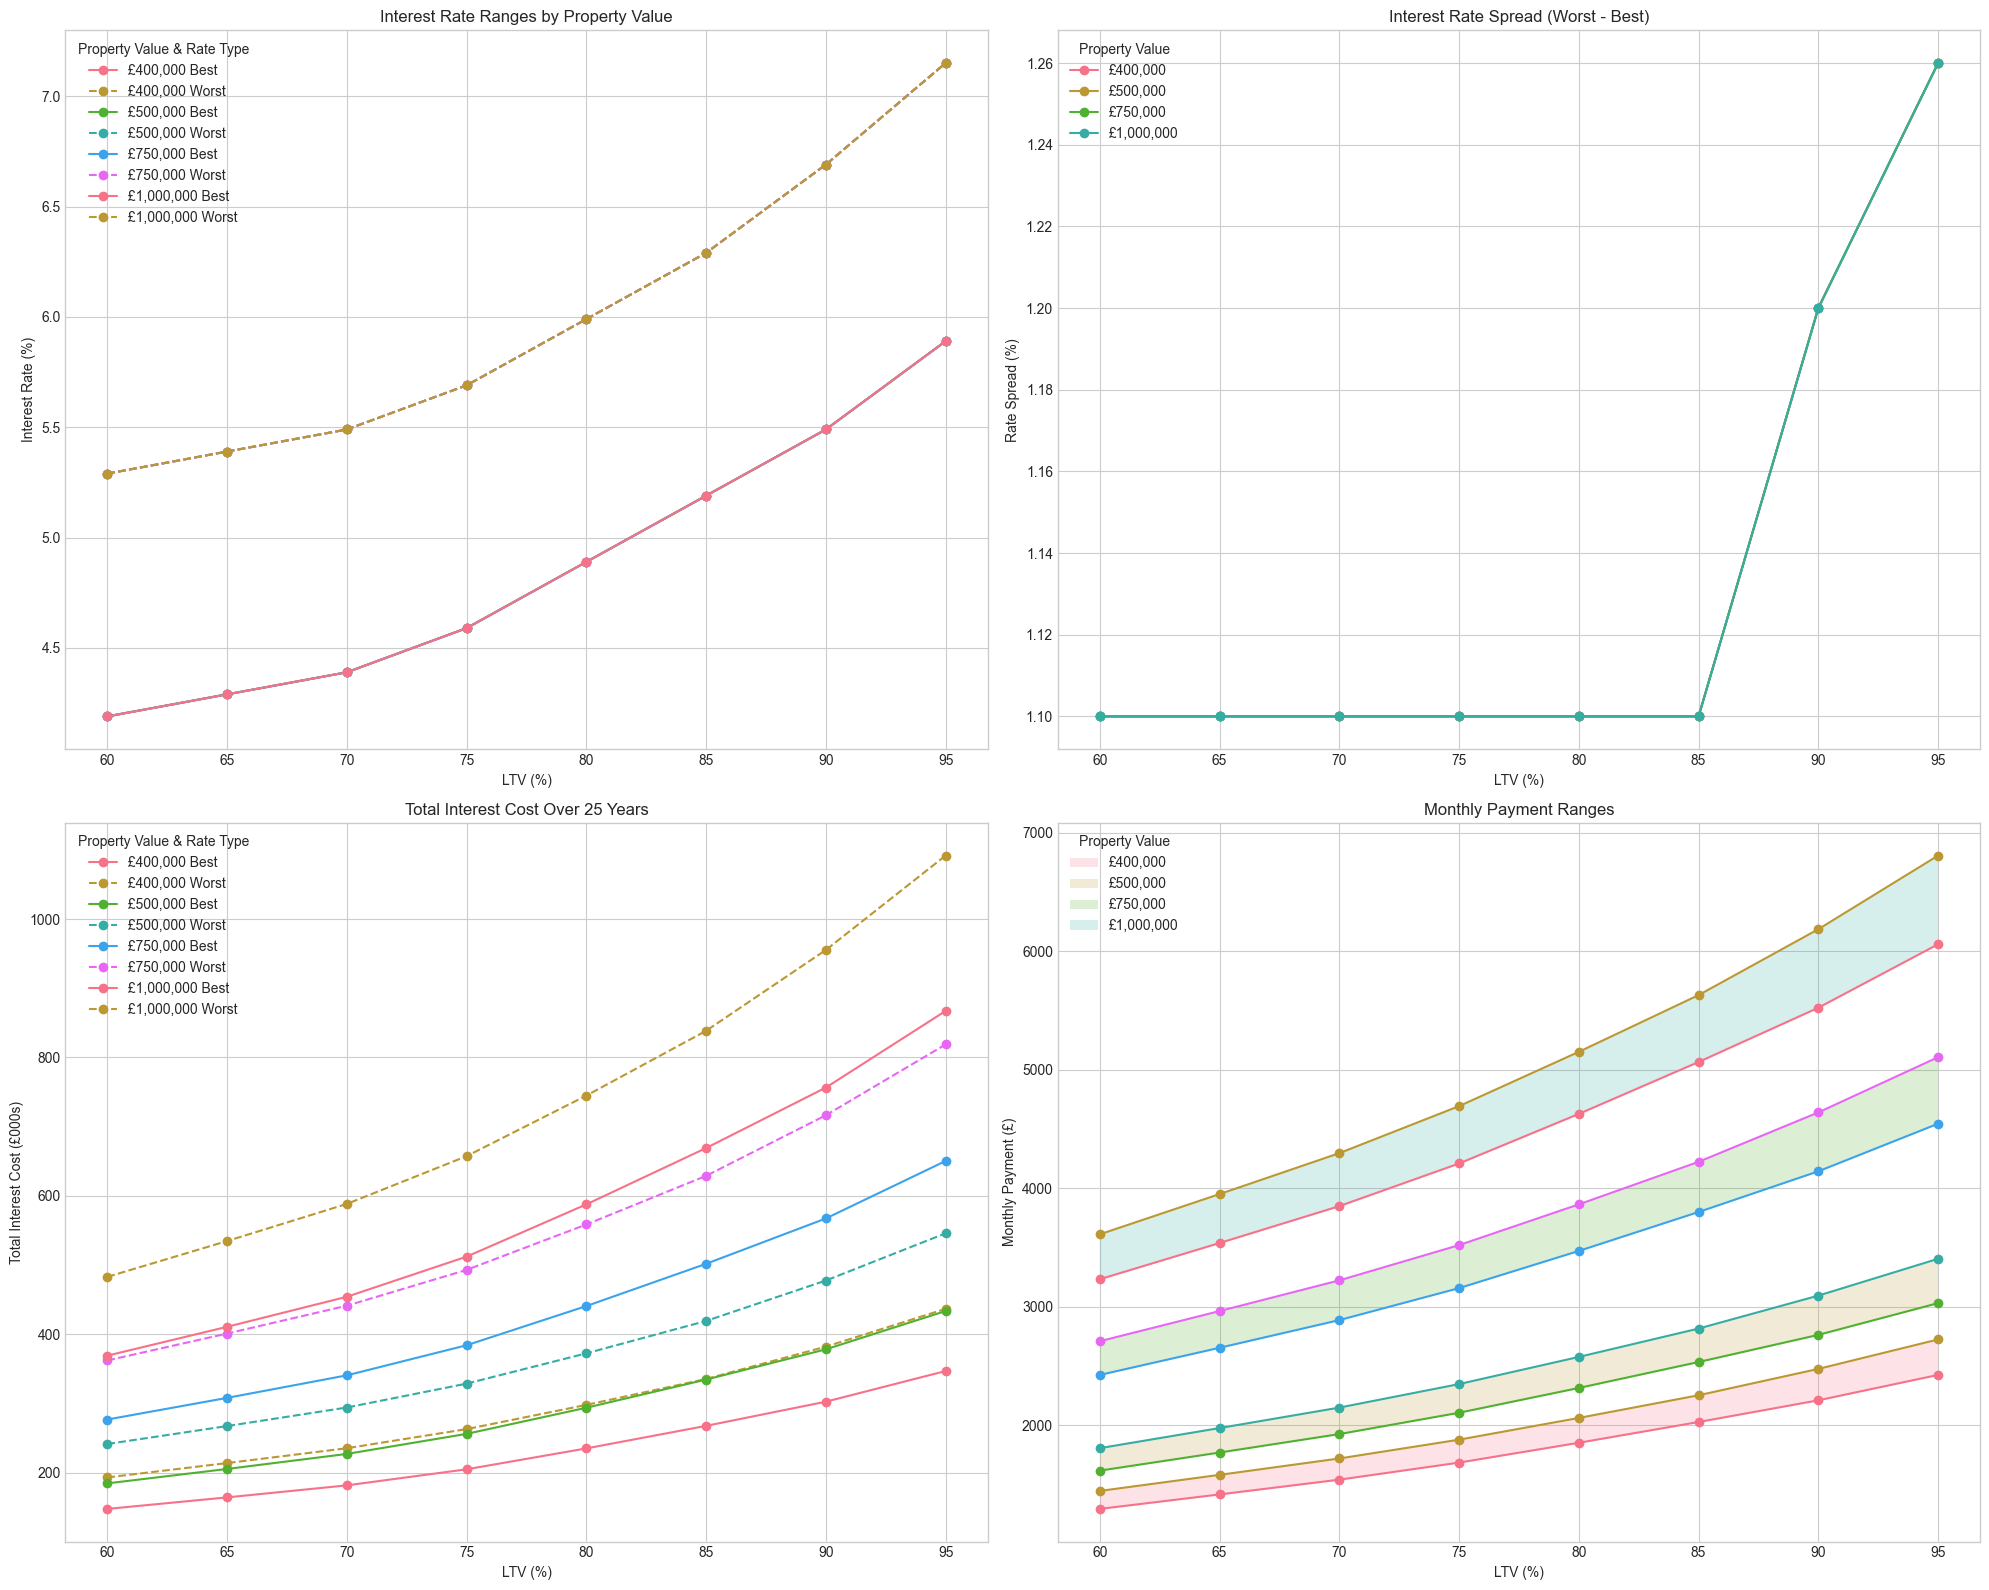

NameError: name 'pd' is not defined

In [8]:
# Initialize calculator
calc = MortgageCalculator()

# Analyze scenarios for different property values common in London
property_values = [400_000, 500_000, 750_000, 1_000_000]
all_scenarios = {}

for value in property_values:
    all_scenarios[value] = calc.analyze_scenarios(value)

# Create multiple visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Interest Rate Ranges by Property Value
for value in property_values:
    scenarios_df = all_scenarios[value]
    ax1.plot(scenarios_df['LTV'], scenarios_df['Best Rate'], 
             marker='o', label=f'£{value:,} Best')
    ax1.plot(scenarios_df['LTV'], scenarios_df['Worst Rate'], 
             marker='o', linestyle='--', label=f'£{value:,} Worst')
    
ax1.set_xlabel('LTV (%)')
ax1.set_ylabel('Interest Rate (%)')
ax1.set_title('Interest Rate Ranges by Property Value')
ax1.legend(title='Property Value & Rate Type')
ax1.grid(True)

# 2. Rate Spread Analysis
for value in property_values:
    scenarios_df = all_scenarios[value]
    rate_spread = scenarios_df['Worst Rate'] - scenarios_df['Best Rate']
    ax2.plot(scenarios_df['LTV'], rate_spread, 
             marker='o', label=f'£{value:,}')
    
ax2.set_xlabel('LTV (%)')
ax2.set_ylabel('Rate Spread (%)')
ax2.set_title('Interest Rate Spread (Worst - Best)')
ax2.legend(title='Property Value')
ax2.grid(True)

# 3. Total Interest Cost Comparison
for value in property_values:
    scenarios_df = all_scenarios[value]
    loan_amounts = value * (scenarios_df['LTV'] / 100)
    
    # Calculate total interest for best and worst rates (25 year term)
    best_total = (scenarios_df['Best Monthly'] * 12 * 25) - loan_amounts
    worst_total = (scenarios_df['Worst Monthly'] * 12 * 25) - loan_amounts
    
    ax3.plot(scenarios_df['LTV'], best_total / 1000, 
             marker='o', label=f'£{value:,} Best')
    ax3.plot(scenarios_df['LTV'], worst_total / 1000, 
             marker='o', linestyle='--', label=f'£{value:,} Worst')

ax3.set_xlabel('LTV (%)')
ax3.set_ylabel('Total Interest Cost (£000s)')
ax3.set_title('Total Interest Cost Over 25 Years')
ax3.legend(title='Property Value & Rate Type')
ax3.grid(True)

# 4. Monthly Payment Comparison
for value in property_values:
    scenarios_df = all_scenarios[value]
    ax4.fill_between(scenarios_df['LTV'], 
                     scenarios_df['Best Monthly'],
                     scenarios_df['Worst Monthly'],
                     alpha=0.2, label=f'£{value:,}')
    ax4.plot(scenarios_df['LTV'], scenarios_df['Best Monthly'], marker='o')
    ax4.plot(scenarios_df['LTV'], scenarios_df['Worst Monthly'], marker='o')

ax4.set_xlabel('LTV (%)')
ax4.set_ylabel('Monthly Payment (£)')
ax4.set_title('Monthly Payment Ranges')
ax4.legend(title='Property Value')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Create summary statistics table
summary_stats = []
for value in property_values:
    scenarios_df = all_scenarios[value]
    
    stats = {
        'Property Value': f'£{value:,}',
        'Avg Best Rate': scenarios_df['Best Rate'].mean(),
        'Avg Worst Rate': scenarios_df['Worst Rate'].mean(),
        'Avg Rate Spread': (scenarios_df['Worst Rate'] - scenarios_df['Best Rate']).mean(),
        'Min Monthly (60% LTV)': scenarios_df[scenarios_df['LTV'] == 60]['Best Monthly'].iloc[0],
        'Max Monthly (95% LTV)': scenarios_df[scenarios_df['LTV'] == 95]['Worst Monthly'].iloc[0],
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
print("\nSummary Statistics:")
display(summary_df.round(2))